In [0]:
from keras.datasets import mnist

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print('The train X size {}'.format(trainX.shape),' \ntrain Y size {}'.format(trainY.shape))

The train X size (60000, 28, 28)  
train Y size (60000,)


In [4]:
print('The test X size {}'.format(testX.shape),' \ntest Y size {}'.format(testY.shape))

The test X size (10000, 28, 28)  
test Y size (10000,)


In [0]:
trainX = trainX.reshape(len(trainX), 28,28,1)  # here last 1 means we used grayscale
testX = testX.reshape(len(testX), 28,28,1)

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
labels = np.unique(trainY)

print('The output labels are ',labels)
print('Number of labels ',len(labels))

The output labels are  [0 1 2 3 4 5 6 7 8 9]
Number of labels  10


In [0]:
from keras.models import Sequential
model = Sequential()

In [0]:
from keras.layers import Flatten, Dense
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D

In [0]:
layer1 = Conv2D(6, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))
model.add(layer1)

layer2 = MaxPooling2D()
model.add(layer2)

In [0]:
layer3 = Conv2D(16, kernel_size=(3,3), activation='relu')
model.add(layer3)

layer4 = MaxPooling2D()
model.add(layer4)

In [0]:
layer5 = Flatten()
model.add(layer5)

In [0]:
layer6 = Dense(120, activation='relu')
model.add(layer6)

In [0]:
layer7 = Dense(84, activation='relu')
model.add(layer7)

In [0]:
layer8 = Dense(10, activation='softmax')
model.add(layer8)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.utils import to_categorical

In [0]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [25]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 27s 449us/step - loss: 0.3332 - accuracy: 0.9258 - val_loss: 0.1200 - val_accuracy: 0.9634
Epoch 2/3
60000/60000 [==============================] - 27s 443us/step - loss: 0.0845 - accuracy: 0.9732 - val_loss: 0.0704 - val_accuracy: 0.9782
Epoch 3/3
60000/60000 [==============================] - 26s 441us/step - loss: 0.0667 - accuracy: 0.9793 - val_loss: 0.0796 - val_accuracy: 0.9780


[[3.0222735e-09 1.0486628e-07 9.9999964e-01 5.1146262e-08 4.0567008e-10
  1.3772971e-12 4.4557131e-13 1.4779252e-07 1.6956596e-08 5.2197074e-10]]


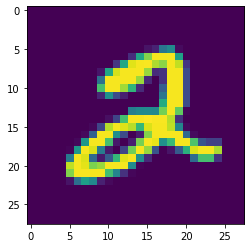

Final output  2


In [26]:
pred = model.predict(trainX[5].reshape(1,28,28,1))
print(pred)

plt.imshow(trainX[5].reshape(28,28))
plt.show()
print('Final output ',np.argmax(pred))

[[3.0222735e-09 1.0486628e-07 9.9999964e-01 5.1146262e-08 4.0567008e-10
  1.3772971e-12 4.4557131e-13 1.4779252e-07 1.6956596e-08 5.2197074e-10]]


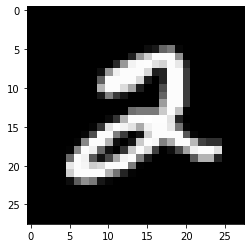

Final output  2


In [28]:
pred = model.predict(trainX[5].reshape(1,28,28,1))
print(pred)

plt.imshow(trainX[5].reshape(28,28), cmap='gray')
plt.show()
print('Final output ',np.argmax(pred))